In [14]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import utils
import vgg19
import copy
import skimage
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#images path here
content_img = utils.load_image("./image/columbia3.jpeg")
style_img = utils.load_image("./image/star.jpg")
shape_c = content_img.shape
content_img = content_img.reshape(1, shape_c[0], shape_c[1], 3)
shape_s = style_img.shape
style_img = style_img.reshape(1, shape_s[0], shape_s[1], 3)

/home/ecbm4040/miniconda3/envs/dlenv/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ecbm4040/miniconda3/envs/dlenv/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [3]:
from generated import neural_style
import numpy as np
tf.reset_default_graph()
#convolutional layers defined here
content_layers = "conv5_2"
style_layers = "conv1_1,conv2_1,conv3_1,conv4_1,conv5_1"
neural_sty = neural_style(content_layers,
                            style_layers,
                            content_img,
                            style_img)

/home/ecbm4040/2018_assignment2_kz2325/KGHJ.project.kz2325.jh4000/vgg19.npy
npy file loaded
build model started
build model finished: 0s
Content feature layers:['conv5_2']
Style feature layers:['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv5_1']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Iteration 100: loss = 1248076.8


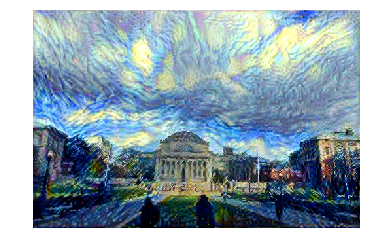

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Iteration 200: loss = 829947.56


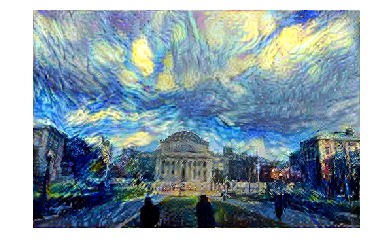

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Iteration 300: loss = 697336.06


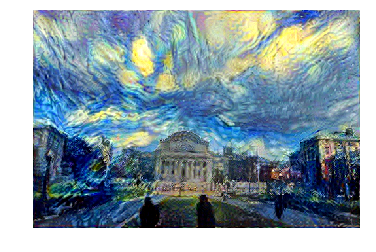

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Iteration 400: loss = 641917.8


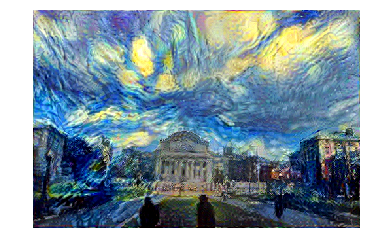

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Iteration 500: loss = 608598.7


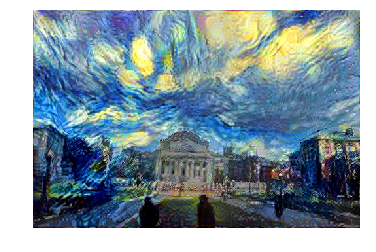

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 606193.812500
  Number of iterations: 500
  Number of functions evaluations: 511
Stylizing time: 124s


In [10]:
#optimization parameters here
iterations = 500
alpha = 0.1
gamma = 0.001 #normally no need to change this
beta = 1 #no need to change this
optimizer = "l-bfgs-b"
lr = 0.01 #need to tune if using Adam or Adamgrad(0.01)
style_weights=[0.2,0.2,0.2,0.2,0.2]
loss_hist,image = neural_sty.run(alpha = alpha,
                                 beta = beta,
                                 gamma = gamma,
                                 style_weights = style_weights,
                                 optimizer = optimizer,
                                 learning_rate = lr,
                                 iterations = iterations)

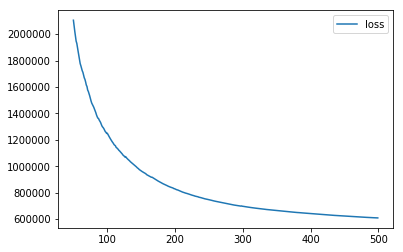

In [18]:
#Loss plot after 50th tieration
plt.plot(range(50,iterations),loss_hist[50:iterations], label="loss")
plt.legend()
plt.show()

In [16]:
from utils import save_image
#saving image path
path = "./output/"
save_image(image, path, optimizer, alpha, iterations, lr)


output image:./output/output_l-bfgs-b_0.1_500_0.01.jpg


/home/ecbm4040/miniconda3/envs/dlenv/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: ./output/output_l-bfgs-b_0.1_500_0.01.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ecbm4040/miniconda3/envs/dlenv/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))
